# Lazy Predict

## 1. Setting

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 무시
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Data Load
train_raw = pd.read_csv("/content/drive/MyDrive/Dataset/People_income/train.csv")
test_raw = pd.read_csv("/content/drive/MyDrive/Dataset/People_income/test.csv")
submission_raw = pd.read_csv("/content/drive/MyDrive/Dataset/People_income/sample_submission.csv")

# Data engineering 을 위한 Data Copy
train = train_raw.copy()
test = test_raw.copy()

## 2. EDA

In [7]:
print(train.info())

print("-" * 100)

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB
None
--------------------------------------------

In [8]:
train.nunique()

id                26049
age                  73
workclass             9
fnlwgt            18422
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         90
hours_per_week       93
native_country       41
income                2
dtype: int64

## 3. Automatically Visualize Dataset 자동 시각화

https://github.com/AutoViML/AutoViz

Lazy Predict 분석에 앞서 autoviz 시각화 분석을 위해 object 타입 변수들의 인코딩을 수행한다.

In [9]:
from sklearn.preprocessing import LabelEncoder

label_col = [col for col in train.columns if train[col].dtypes == 'object' and col != 'income']

le = LabelEncoder()

for col in label_col:
    train[col] = le.fit_transform(train[col])

In [10]:
train.head()

id  age  workclass  fnlwgt  education  education_num  marital_status  \
0   0  40       4      168538     11            9               2         
1   1  17       4      101626      6            5               4         
2   2  18       4      353358     15           10               4         
3   3  21       4      151158     15           10               4         
4   4  24       4      122234     15           10               4         

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0      12            0         4    1         0             0        
1       7            3         4    1         0             0        
2       8            3         4    1         0             0        
3      10            3         4    0         0             0        
4       1            1         2    0         0             0        

   hours_per_week  native_country income  
0        60              38         >50K  
1        20              38        <=50K  
2        16              38        <=50K  
3        25              38        <=50K  
4        20               0        <=50K

id 칼럼의 unique 값이 26,000 개로 해당 칼럼 Drop

In [11]:
drop_col = ['id']

train = train.drop(columns=drop_col)

In [12]:
!pip install -q autoviz

Shape of your Data Set loaded: (26049, 15)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing upto 30 columns (max) in each category:
    Numeric Columns : []
    Integer-Categorical Columns: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']
    String-Categorical Columns: []
    Factor-Categorical Columns: []
    String-Boolean Columns: []
    Numeric-Boolean Columns: ['sex']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that will not be considered in modeling: []
    14 Predictors classified...
        No variables removed since

Total Number of Scatter Plots = 91
All Plots are saved in ./AutoViz_Plots/income
Time to run AutoViz = 116 seconds 


age  workclass  fnlwgt  education  education_num  marital_status  \
20528  49       4      122066     11            9               2         
14862  26       4      248612      9           13               4         
5219   34       7       85218     12           14               4         
17671  47       4       28035      9           13               2         
12888  43       0      387839     11            9               4         
...    ...        ...     ...        ...            ...             ...   
13123  32       4      281030     11            9               2         
19648  25       4       34402      9           13               4         
9845   19       4      102723     15           10               4         
10799  24       4      137591     15           10               4         
2732   28       4      136077      0            6               4         

       occupation  relationship  race  sex  capital_gain  capital_loss  \
20528       4            0         4    1         0              0       
14862      10            3         4    1         0              0       
5219       10            4         2    0         0              0       
17671       4            0         4    1         0              0       
12888       0            2         4    0         0              0       
...           ...           ...   ...  ...           ...           ...   
13123       7            0         4    1         0              0       
19648       4            1         4    1         0           1590       
9845        1            3         4    0         0              0       
10799      12            3         4    1         0              0       
2732        6            1         4    1         0              0       

       hours_per_week  native_country  income  
20528        30              17           0    
14862        30              38           0    
5219         24              38           0    
17671        50              38           1    
12888        40              38           0    
...               ...             ...     ...  
13123        40              38           0    
19648        60              38           0    
9845         40              38           0    
10799        10              12           0    
2732         40              38           0    

[26049 rows x 15 columns]

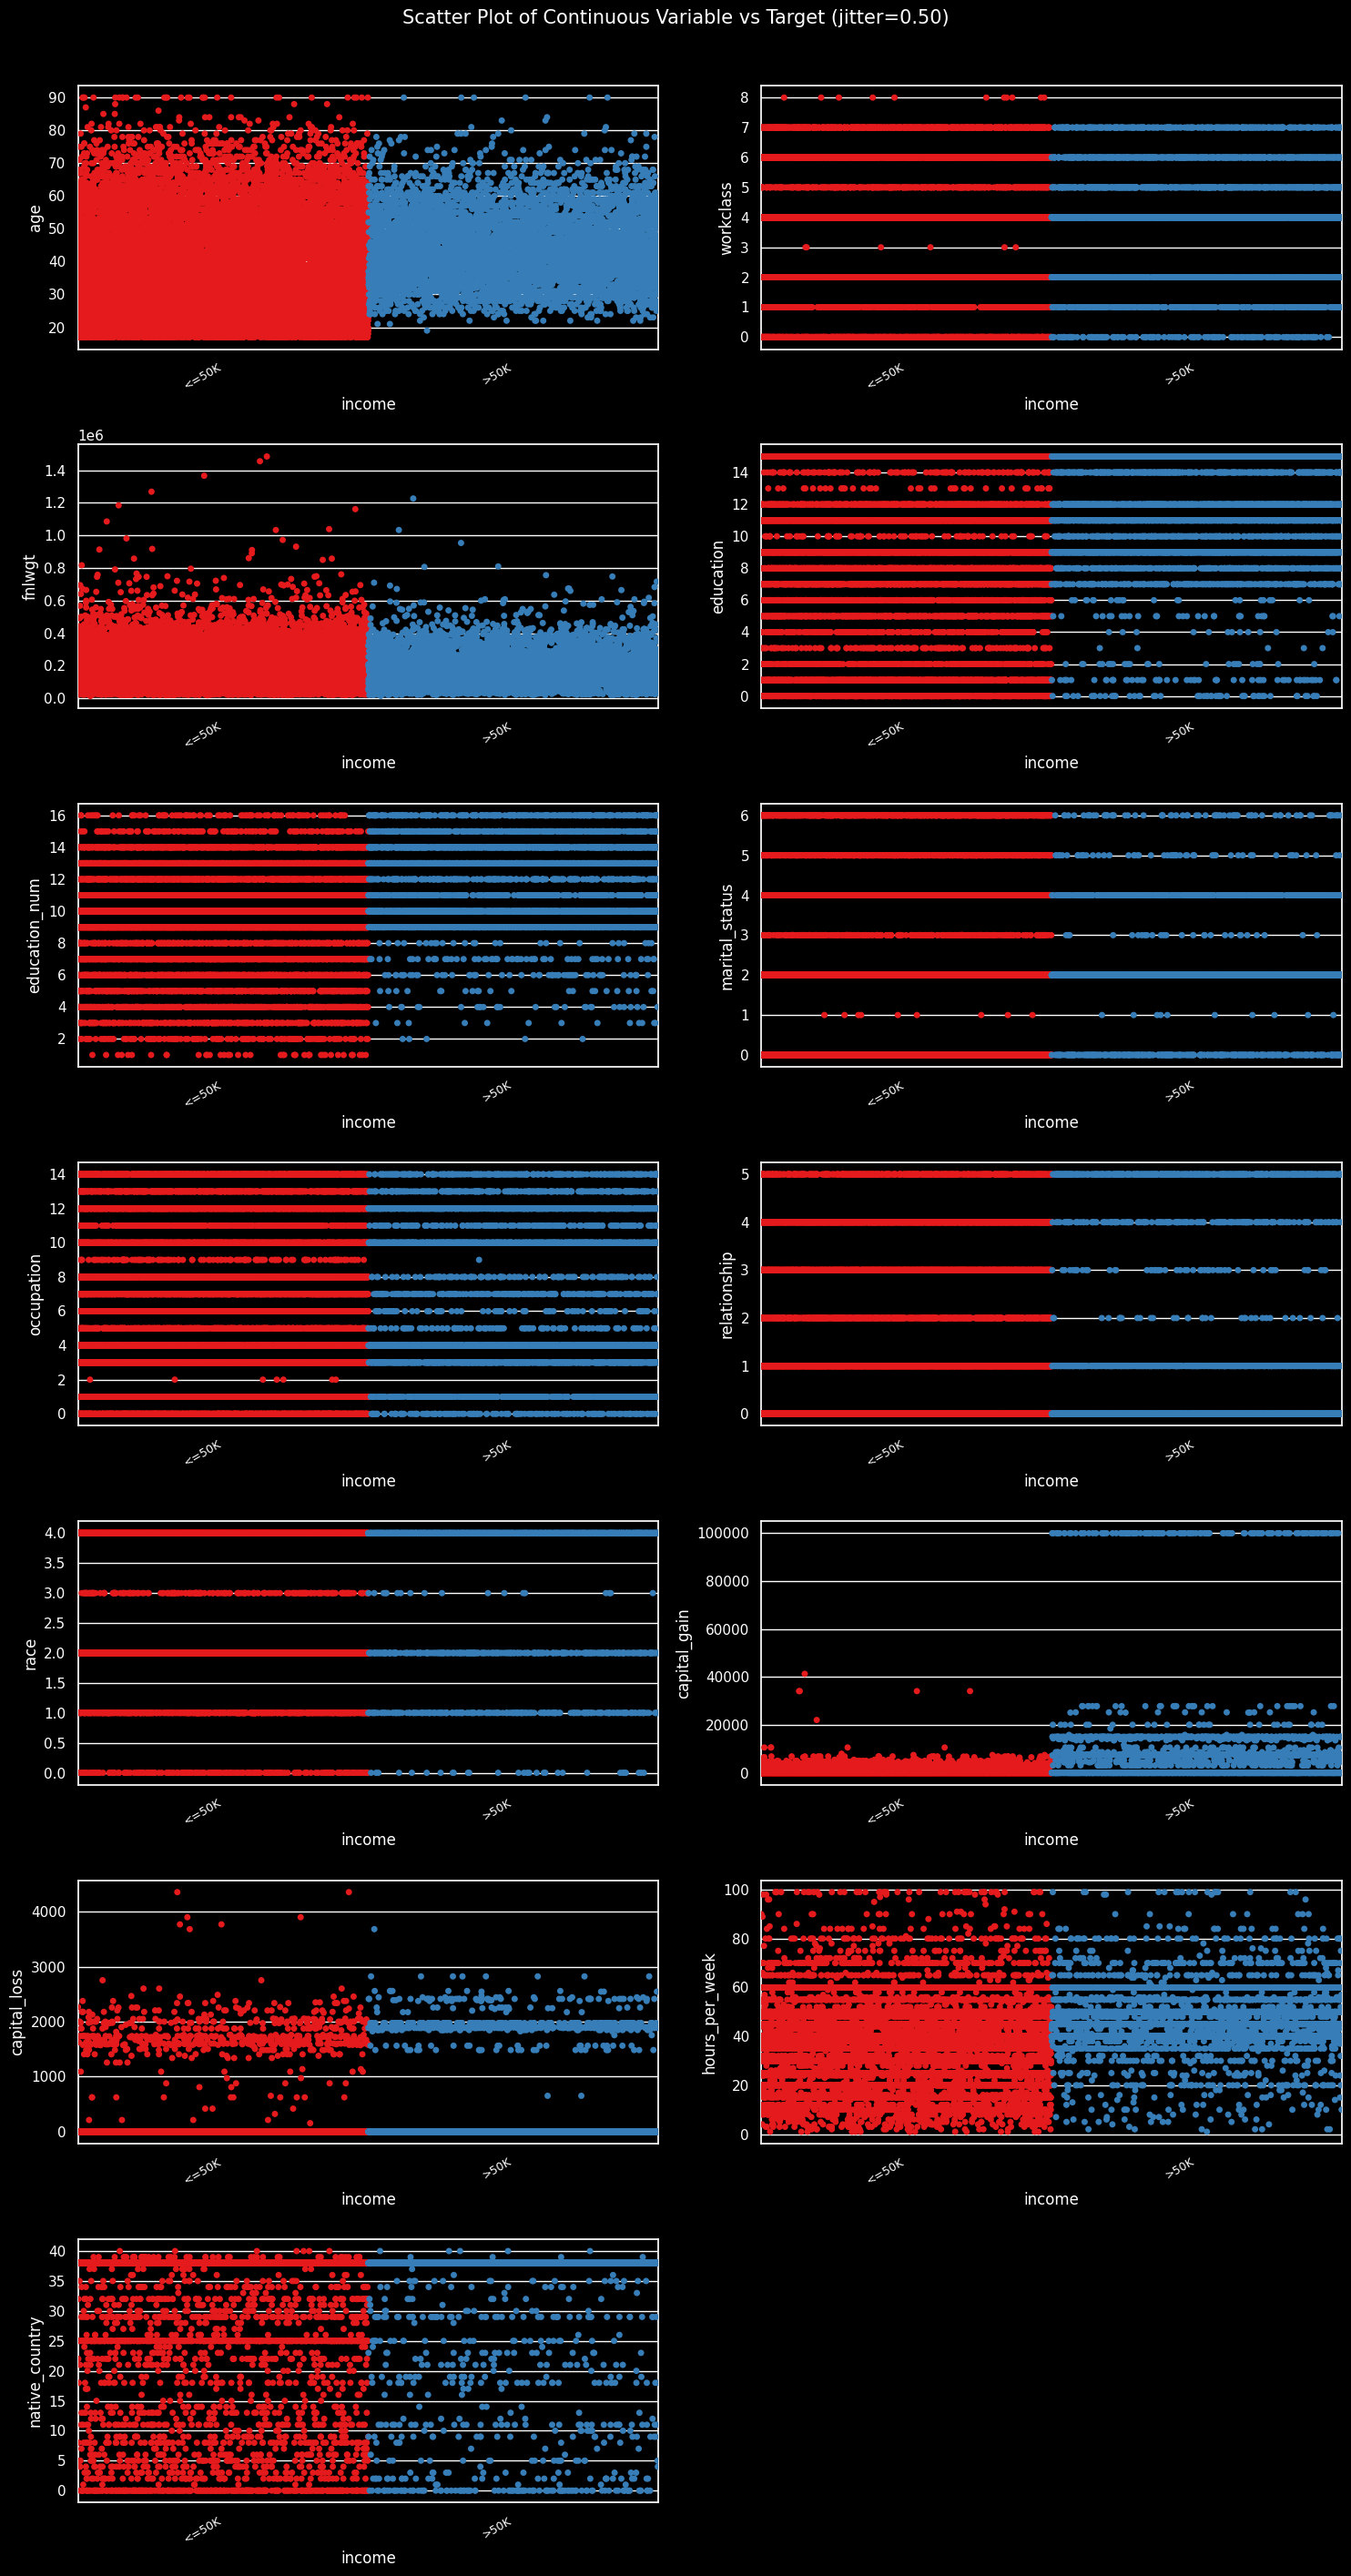

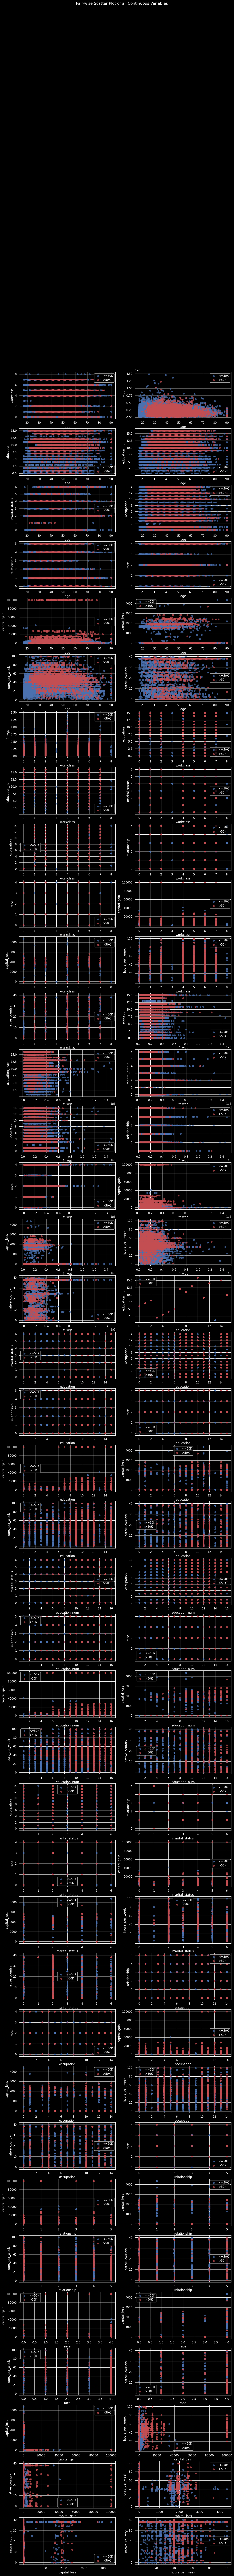

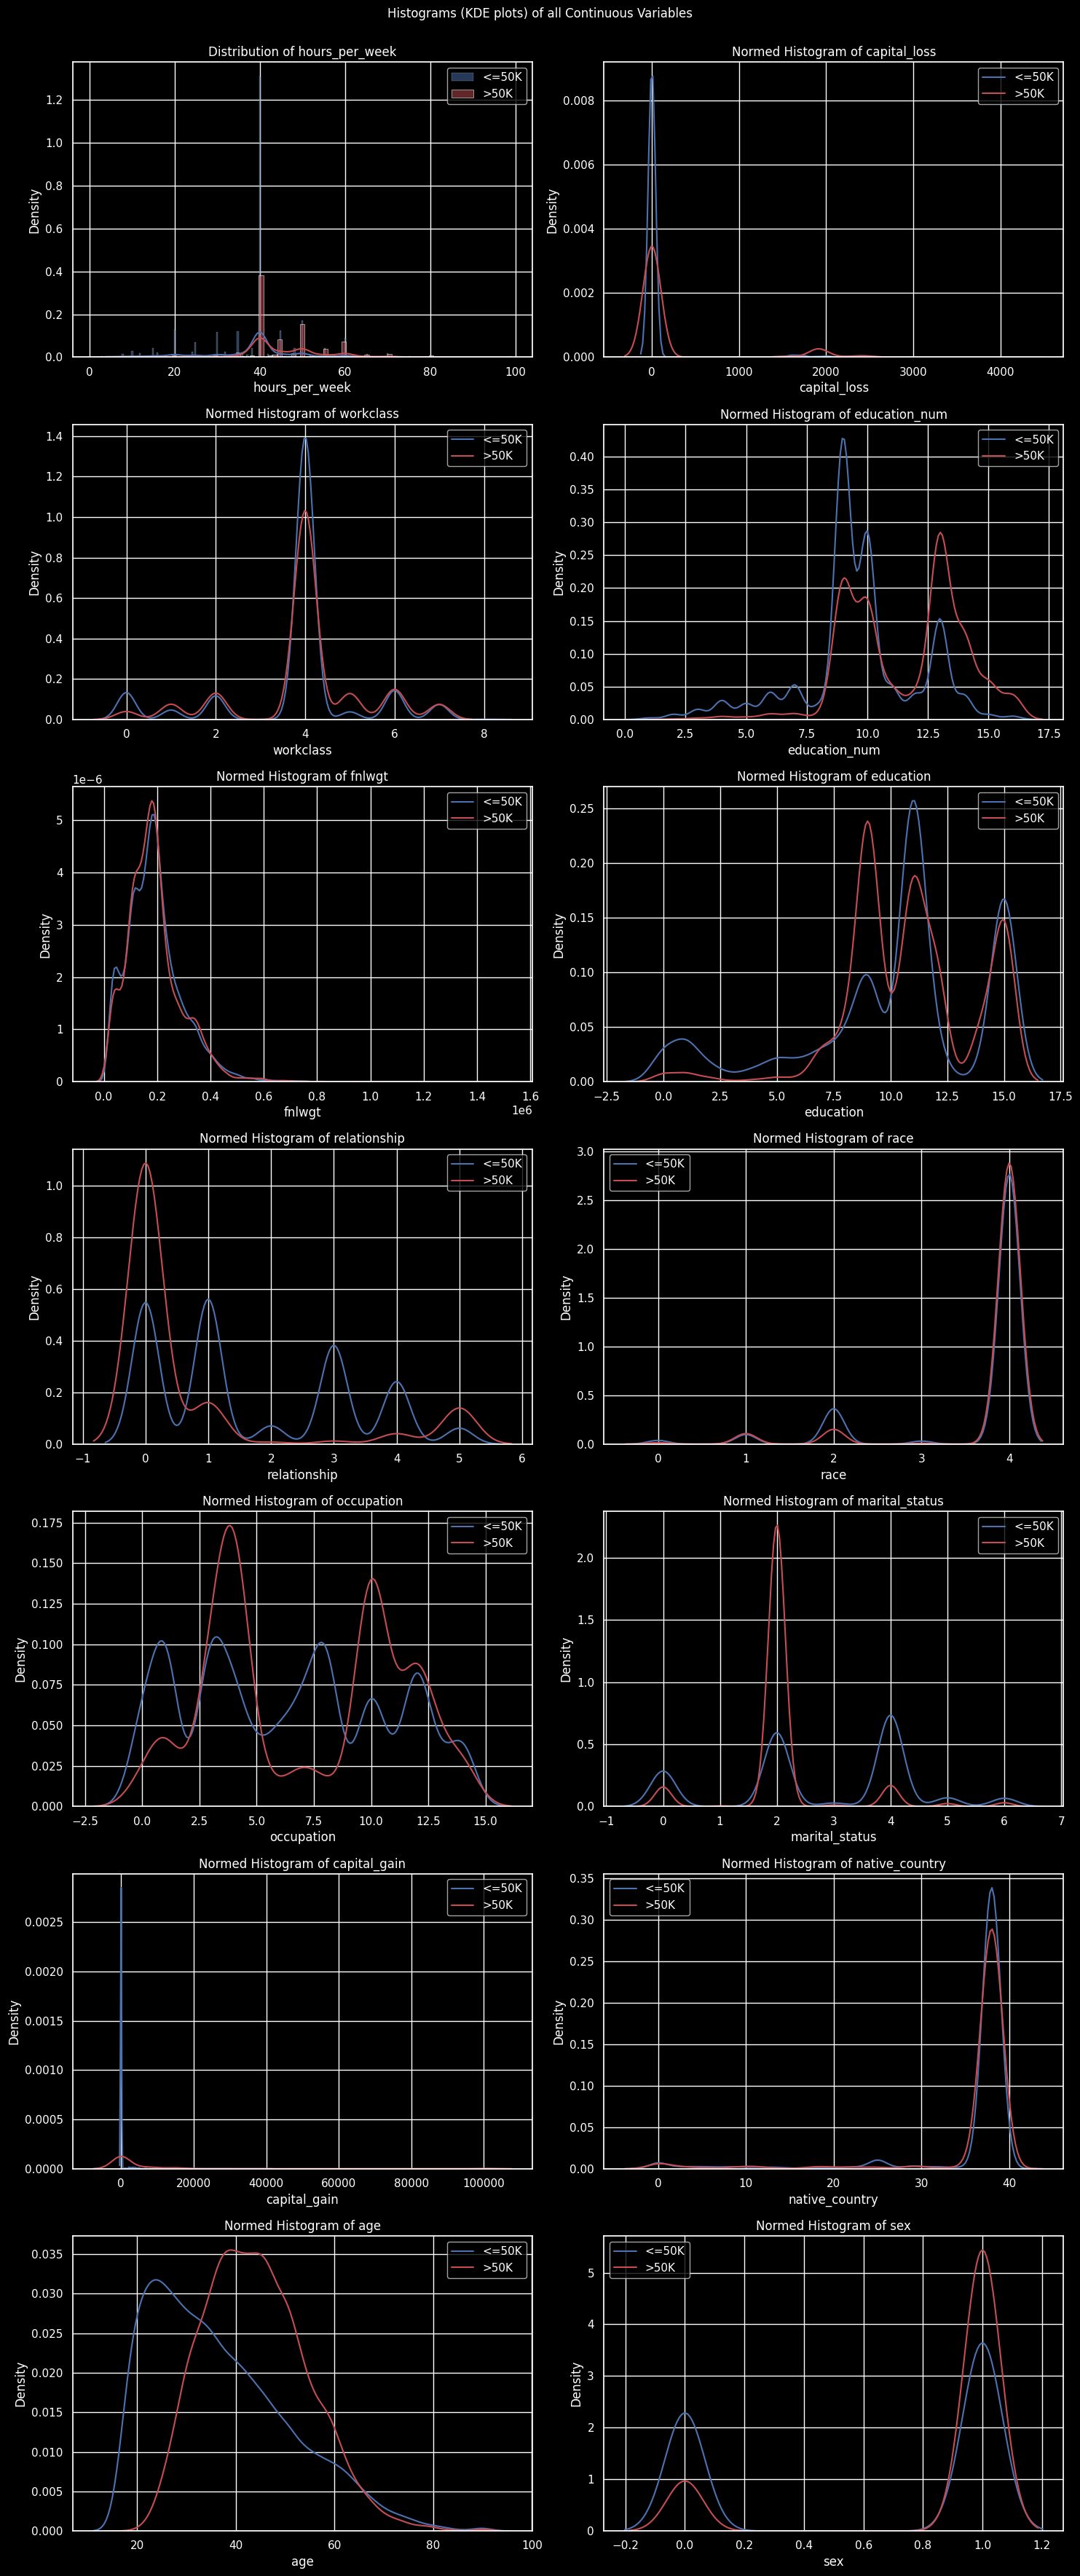

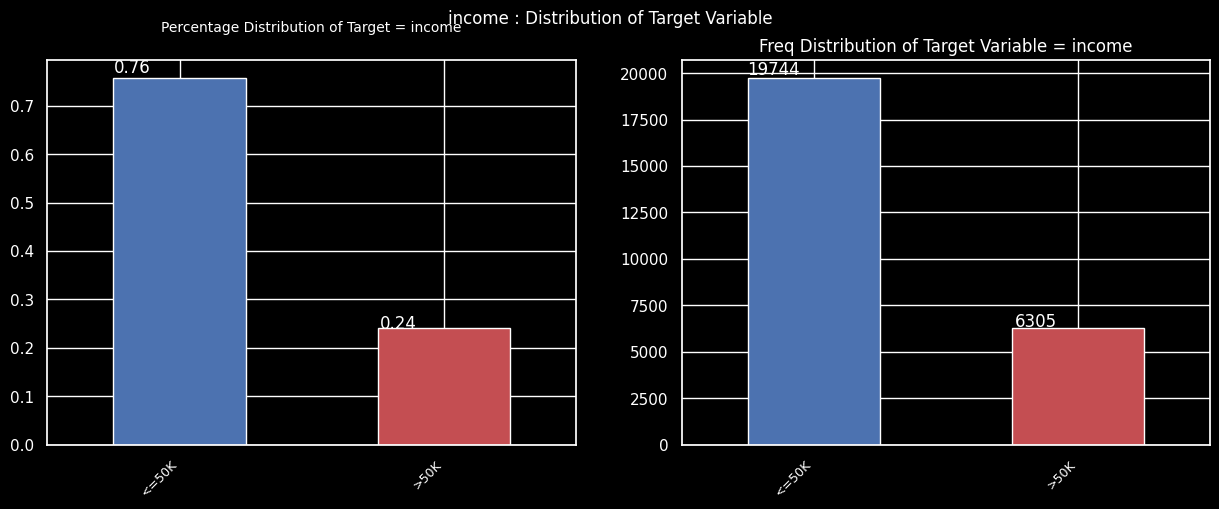

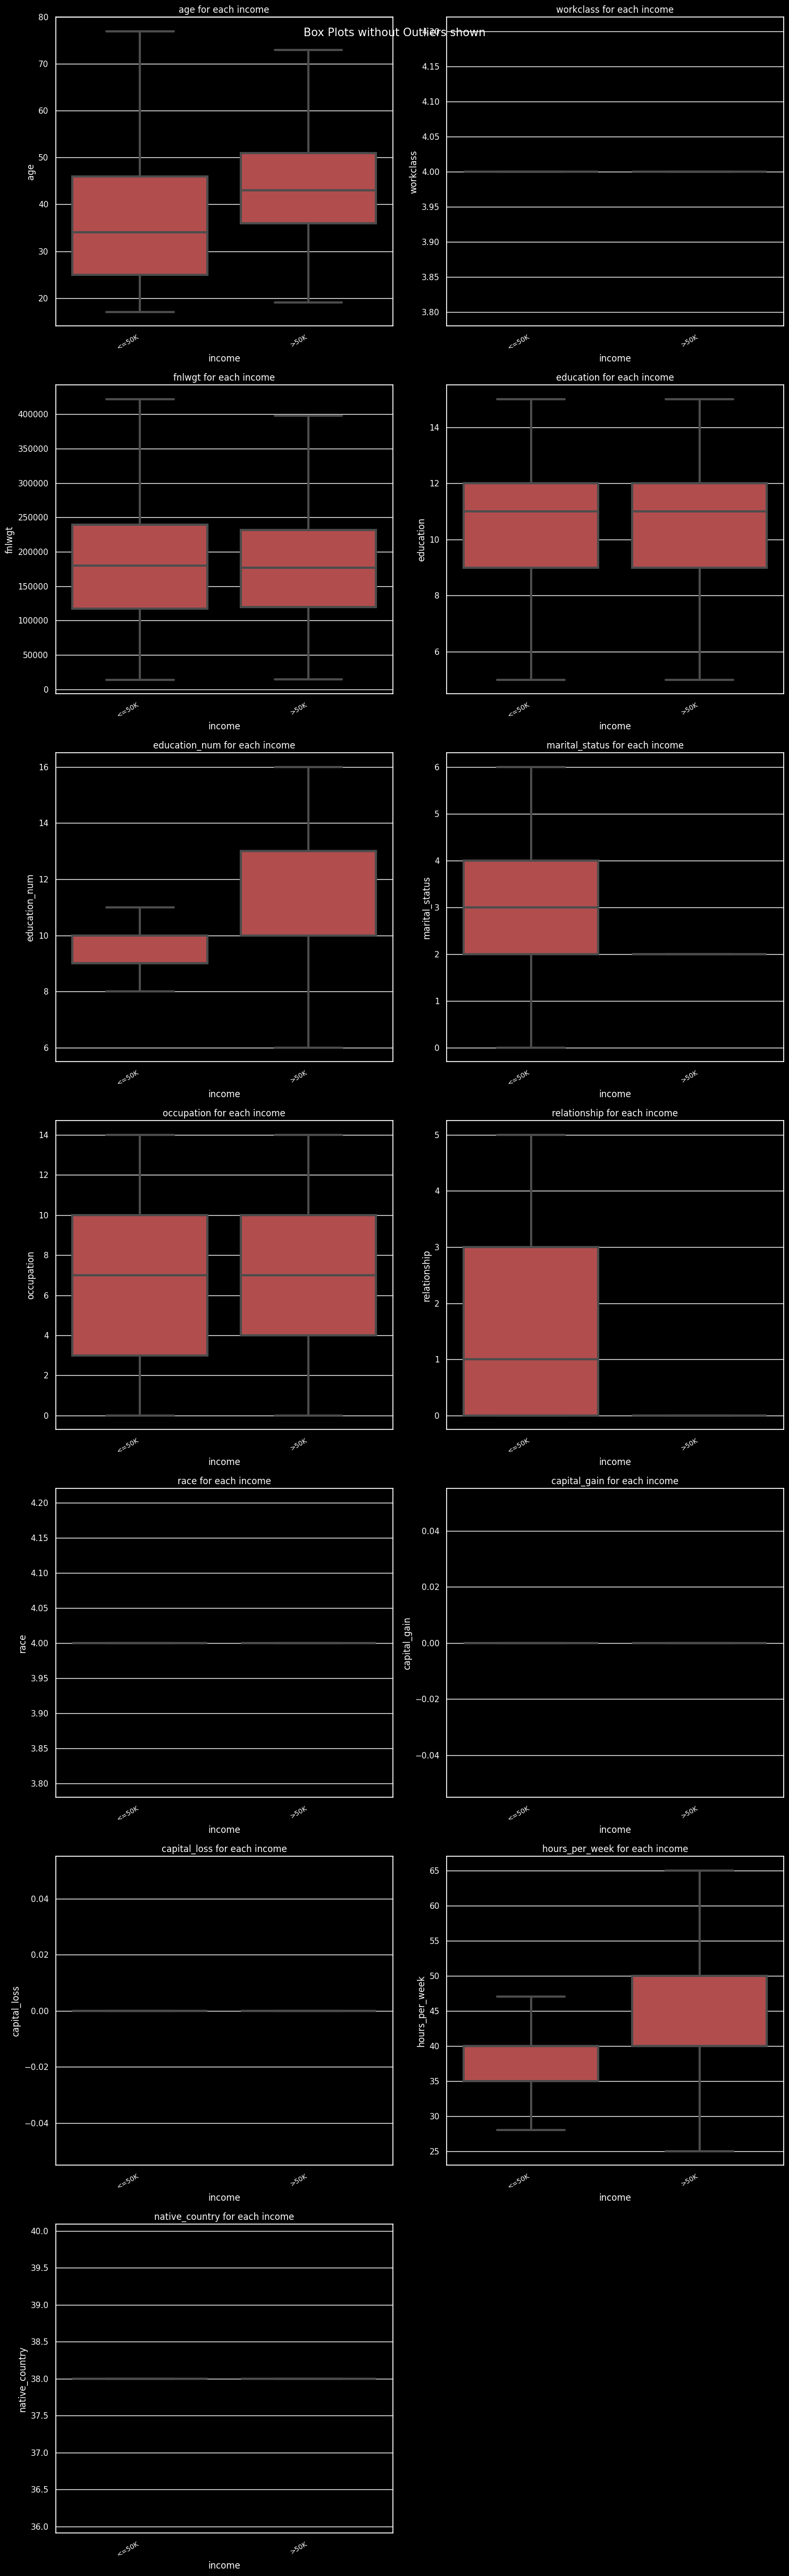

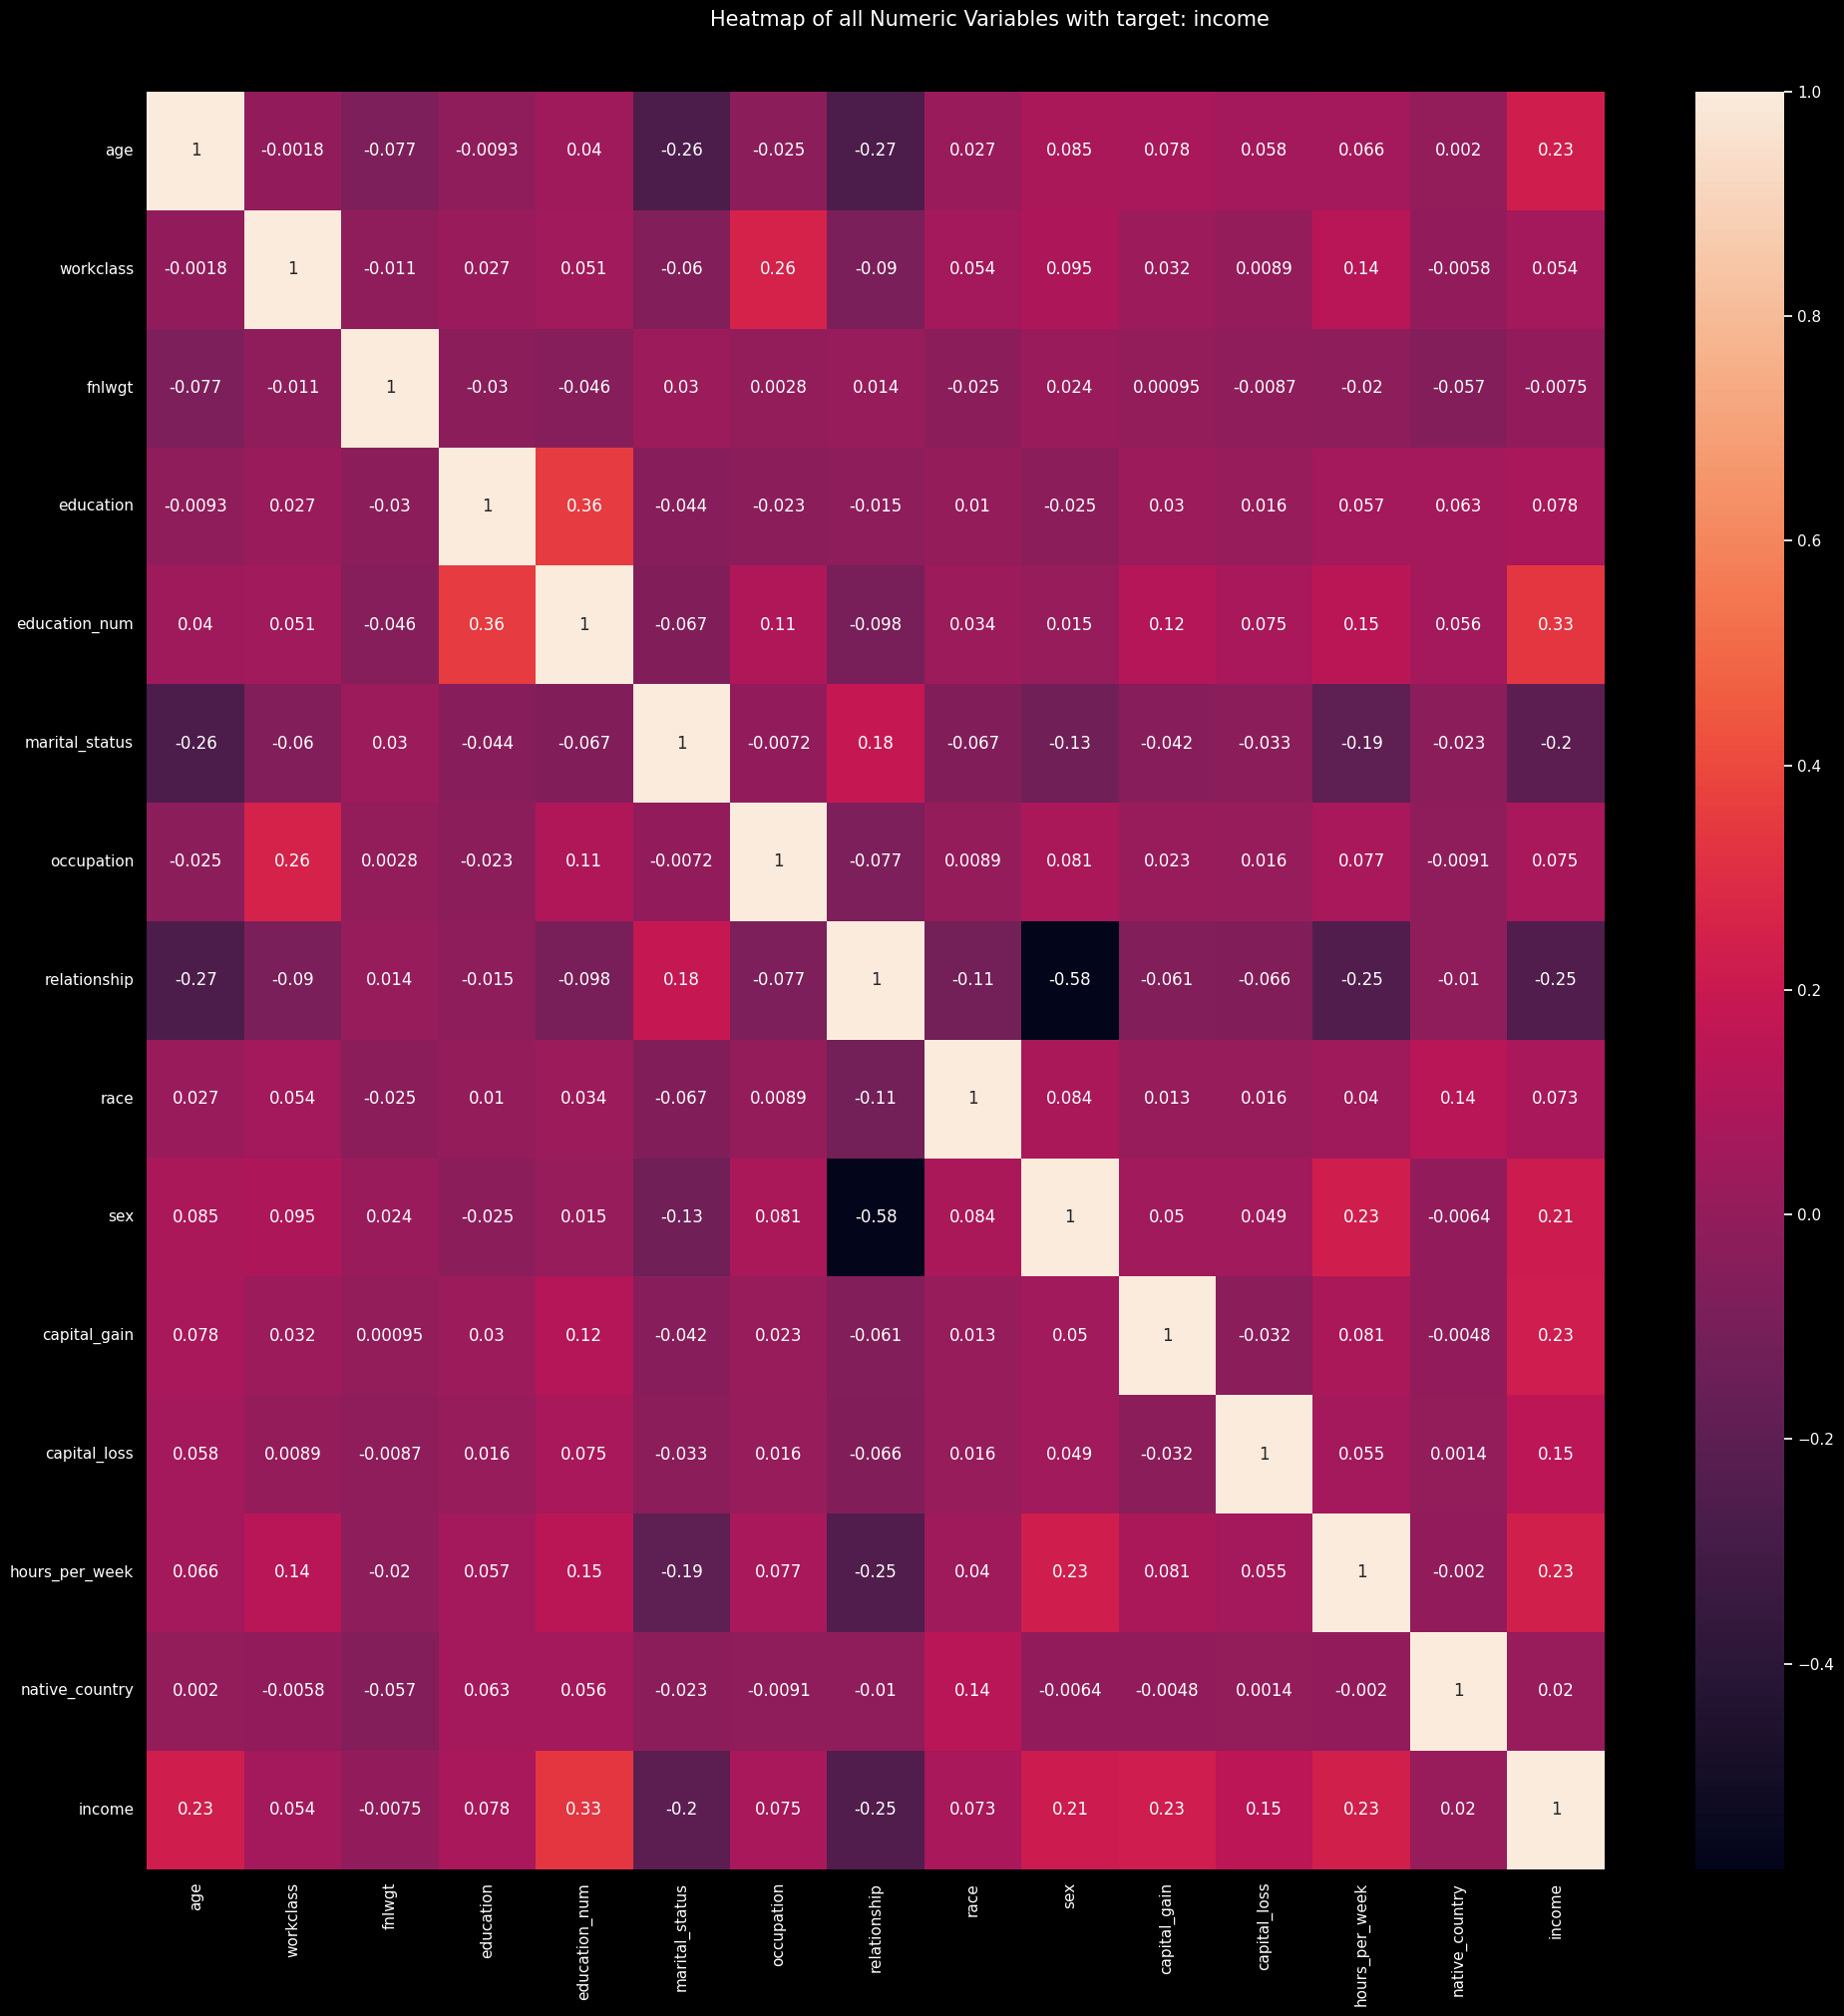

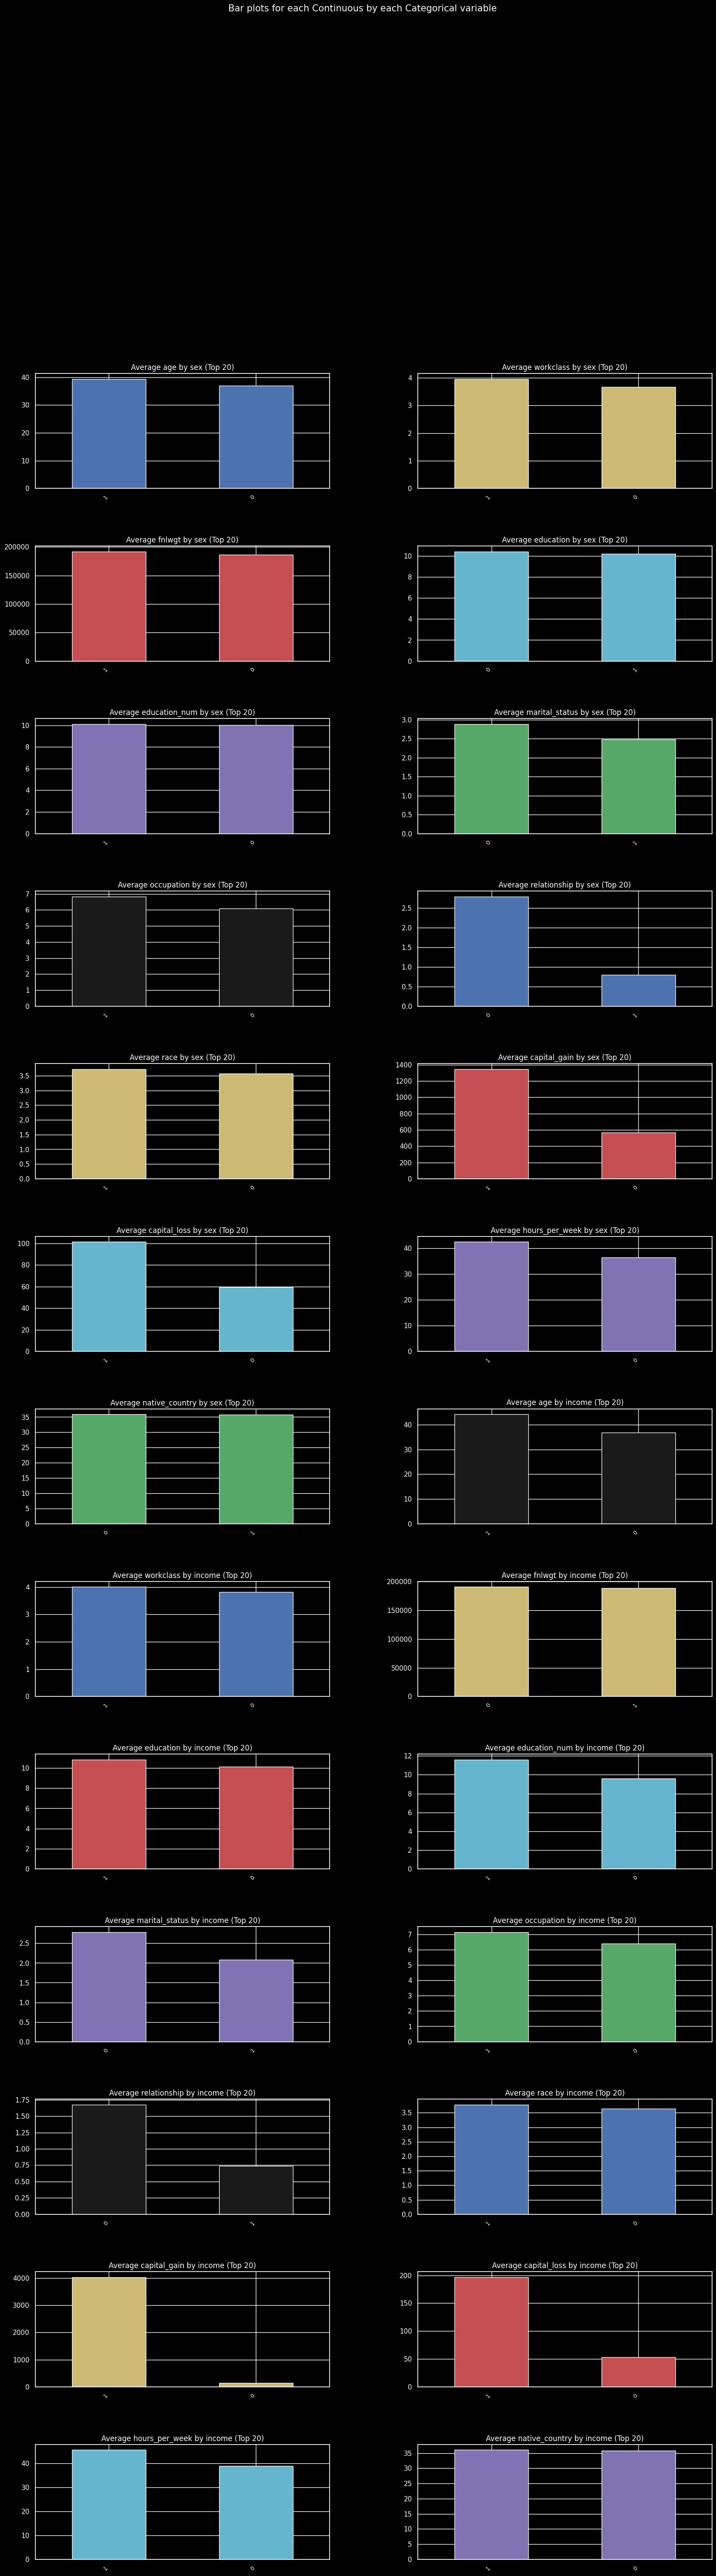

In [13]:
%matplotlib inline

from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt

plt.style.use('dark_background')

AV = AutoViz_Class()

AV.AutoViz(
    filename='',
    dfte=train,
    depVar='income',
    verbose=2, # 0: 간단히 표시; 1: 자세히 표시; 2: 파일로 저장
    max_rows_analyzed=train.shape[0],
    max_cols_analyzed=train.shape[1])

## 4. LazyPredict

LazyPredict는 AutoML with scikit-learn 으로 자동으로 베스트 모델 찾아주는 패키지입니다.

https://lazypredict.readthedocs.io/en/latest/

In [14]:
!pip install scikit-learn==0.23.1
!pip install -q lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 25.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


### 4.1 Train / Test Data Splite

In [16]:
train.head()

age  workclass  fnlwgt  education  education_num  marital_status  \
0  40       4      168538     11            9               2         
1  17       4      101626      6            5               4         
2  18       4      353358     15           10               4         
3  21       4      151158     15           10               4         
4  24       4      122234     15           10               4         

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0      12            0         4    1         0             0        
1       7            3         4    1         0             0        
2       8            3         4    1         0             0        
3      10            3         4    0         0             0        
4       1            1         2    0         0             0        

   hours_per_week  native_country income  
0        60              38         >50K  
1        20              38        <=50K  
2        16              38        <=50K  
3        25              38        <=50K  
4        20               0        <=50K

In [17]:
x_data = train
y_data = train.pop('income')

print(x_data.shape)
print(y_data.shape)

(26049, 14)
(26049,)


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_data,
    y_data,
    test_size=0.2,
    random_state=2024,
    stratify=y_data) # 클래스 비율을 동일하게 분할

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(20839, 14) (20839,)
(5210, 14) (5210,)


### 4.2 모델 성능 자동 비교

In [19]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, predictions=True)

models, predictions = clf.fit(x_train, x_test, y_train, y_test)

models

 90%|████████▉ | 26/29 [01:50<00:15,  5.05s/it]

[LightGBM] [Info] Number of positive: 5044, number of negative: 15795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 20839, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242046 -> initscore=-1.141494
[LightGBM] [Info] Start training from score -1.141494


100%|██████████| 29/29 [01:50<00:00,  3.82s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                   0.88          0.80          None     0.87     
RandomForestClassifier           0.86          0.78          None     0.85     
AdaBoostClassifier               0.86          0.77          None     0.85     
ExtraTreesClassifier             0.84          0.76          None     0.84     
NearestCentroid                  0.73          0.76          None     0.75     
BaggingClassifier                0.85          0.76          None     0.84     
DecisionTreeClassifier           0.81          0.75          None     0.81     
SVC                              0.85          0.75          None     0.84     
KNeighborsClassifier             0.82          0.74          None     0.82     
BernoulliNB                      0.80          0.74          None     0.80     
ExtraTreeClassifier              0.80          0.73          None     0.80     
LabelPropagation                 0.79          0.72          None     0.79     
LabelSpreading                   0.80          0.72          None     0.79     
SGDClassifier                    0.83          0.72          None     0.82     
PassiveAggressiveClassifier      0.72          0.71          None     0.74     
LogisticRegression               0.82          0.69          None     0.81     
CalibratedClassifierCV           0.82          0.69          None     0.81     
LinearSVC                        0.82          0.68          None     0.80     
Perceptron                       0.78          0.68          None     0.78     
LinearDiscriminantAnalysis       0.81          0.68          None     0.79     
RidgeClassifierCV                0.81          0.65          None     0.78     
RidgeClassifier                  0.81          0.65          None     0.78     
GaussianNB                       0.80          0.64          None     0.77     
QuadraticDiscriminantAnalysis    0.80          0.64          None     0.77     
DummyClassifier                  0.76          0.50          None     0.65     

                               Time Taken  
Model                                      
LGBMClassifier                    0.46     
RandomForestClassifier            2.59     
AdaBoostClassifier                1.57     
ExtraTreesClassifier              1.69     
NearestCentroid                   0.28     
BaggingClassifier                 0.96     
DecisionTreeClassifier            0.19     
SVC                              15.11     
KNeighborsClassifier              2.05     
BernoulliNB                       0.26     
ExtraTreeClassifier               0.11     
LabelPropagation                 24.75     
LabelSpreading                   46.91     
SGDClassifier                     0.20     
PassiveAggressiveClassifier       0.38     
LogisticRegression                0.57     
CalibratedClassifierCV            8.15     
LinearSVC                         2.48     
Perceptron                        0.36     
LinearDiscriminantAnalysis        0.26     
RidgeClassifierCV                 0.29     
RidgeClassifier                   0.25     
GaussianNB                        0.09     
QuadraticDiscriminantAnalysis     0.43     
DummyClassifier                   0.07

위 Lazypredict에서 추출한 Model 별 테스트 데이터 예측 값을 확인합니다.

In [20]:
predictions.head()

AdaBoostClassifier BaggingClassifier BernoulliNB CalibratedClassifierCV  \
0         >50K               >50K           >50K            <=50K           
1        <=50K              <=50K          <=50K            <=50K           
2        <=50K              <=50K          <=50K            <=50K           
3         >50K               >50K           >50K             >50K           
4        <=50K              <=50K          <=50K            <=50K           

  DecisionTreeClassifier DummyClassifier ExtraTreeClassifier  \
0          <=50K               <=50K              >50K         
1          <=50K               <=50K             <=50K         
2          <=50K               <=50K             <=50K         
3           >50K               <=50K              >50K         
4          <=50K               <=50K             <=50K         

  ExtraTreesClassifier GaussianNB KNeighborsClassifier LabelPropagation  \
0          >50K           <=50K            >50K               >50K        
1         <=50K           <=50K           <=50K              <=50K        
2         <=50K           <=50K           <=50K              <=50K        
3          >50K            >50K            >50K               >50K        
4         <=50K           <=50K           <=50K              <=50K        

  LabelSpreading LinearDiscriminantAnalysis LinearSVC LogisticRegression  \
0       >50K                <=50K              <=50K         <=50K         
1      <=50K                <=50K              <=50K         <=50K         
2      <=50K                <=50K              <=50K         <=50K         
3       >50K                <=50K               >50K          >50K         
4      <=50K                <=50K              <=50K         <=50K         

  NearestCentroid PassiveAggressiveClassifier Perceptron  \
0        >50K                  >50K               >50K     
1       <=50K                 <=50K              <=50K     
2       <=50K                 <=50K              <=50K     
3        >50K                  >50K               >50K     
4       <=50K                 <=50K              <=50K     

  QuadraticDiscriminantAnalysis RandomForestClassifier RidgeClassifier  \
0              <=50K                      >50K               <=50K       
1              <=50K                     <=50K               <=50K       
2              <=50K                     <=50K               <=50K       
3               >50K                      >50K               <=50K       
4              <=50K                     <=50K               <=50K       

  RidgeClassifierCV SGDClassifier  SVC   LGBMClassifier  
0        <=50K            >50K      >50K       >50K      
1        <=50K           <=50K     <=50K      <=50K      
2        <=50K           <=50K     <=50K      <=50K      
3        <=50K            >50K      >50K       >50K      
4        <=50K           <=50K     <=50K      <=50K

모델 별 분류 리포트를 출력합니다.

In [23]:
from sklearn.metrics import classification_report

for lazy_model in predictions.columns.tolist():
    print("-"*70)
    print(f'{lazy_model}')
    print(classification_report(y_test, predictions[lazy_model]))

----------------------------------------------------------------------
AdaBoostClassifier
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      3949
        >50K       0.77      0.60      0.68      1261

    accuracy                           0.86      5210
   macro avg       0.83      0.77      0.79      5210
weighted avg       0.85      0.86      0.85      5210

----------------------------------------------------------------------
BaggingClassifier
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      3949
        >50K       0.72      0.58      0.65      1261

    accuracy                           0.85      5210
   macro avg       0.80      0.76      0.77      5210
weighted avg       0.84      0.85      0.84      5210

----------------------------------------------------------------------
BernoulliNB
              precision    recall  f1-score   support

       <=50K       0.87      

## 5. 모델 선정1 : LGBM

위 Lazypredict의 모델 별 정확도를 기준으로 가장 성능이 높은 LGBM 모델을 활용합니다.

In [24]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm = LGBMClassifier()

lgbm.fit(x_train, y_train)

y_pred = lgbm.predict(x_test)

accuracy_score(y_pred, y_test)

[LightGBM] [Info] Number of positive: 5044, number of negative: 15795
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 20839, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242046 -> initscore=-1.141494
[LightGBM] [Info] Start training from score -1.141494


0.8756238003838771

In [26]:
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train = pd.DataFrame(x_train)
X_test = pd.DataFrame(x_test)

pipe = Pipeline(steps=[
    ("preprocessor", StandardScaler()),
    ("classifier", SVC())
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

accuracy_score(y_pred, y_test)

0.8481765834932822

In [27]:
pipe['classifier'].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## 6. Auto 파라미터 최적화

scikit-optimize는 Scikit-learn 의 머신러닝 모델들의 파라미터 자동 튜닝 패키지입니다.

https://scikit-optimize.github.io/stable/

In [25]:
!pip install -q scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.2 MB/s eta 0:00:00


In [28]:
from skopt import BayesSearchCV

pipe = Pipeline(steps=[
    ("preprocessor", StandardScaler()),
    ("classifier", SVC())
])

opt = BayesSearchCV(
    pipe,
    {
        'classifier__C': (1e-1, 1e+1, 'log-uniform'),
        'classifier__gamma': (1e-6, 1e+1, 'log-uniform'),
        'classifier__degree': (1, 8),  # integer valued parameter
        'classifier__kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=8,
    cv=3
)

opt.fit(x_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(x_test, y_test))

val. score: 0.8469695199388046
test score: 0.8493282149712092


In [29]:
opt.best_params_

OrderedDict([('classifier__C', 2.111233161458049),
             ('classifier__degree', 7),
             ('classifier__gamma', 0.03807450535448192),
             ('classifier__kernel', 'rbf')])